In [1]:
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as clt

from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

from ripser import ripser, lower_star_img
from persim import plot_diagrams
from scipy import ndimage

In [2]:
## Functions
def dictToNumpy(dictionary):
    output = list(dictionary.values())
    output = np.array(output)
    return(output)

def shaper(df, rows):
    df = np.reshape(df, (-1, rows))
    return(df)

def binary(df,ones='coral'):
    with np.errstate(divide='ignore',invalid='ignore'):
        if ones == 'coral':
            df = np.nan_to_num(df/df)
        elif ones == 'turf':
            df = (df-1)**2
        elif ones == 'macro':
            df = np.nan_to_num((df-2)**2/(df-2)**2)
    return(df)

def tdaPrep(df, rows, ones='coral'):
    df = binary(df,ones)
    dfi = 1-df   
    df = shaper(df,rows)
    dfi = shaper(dfi,rows)
    return(df, dfi)

def readPrep(simulation, timestep, rows):
    
    df = np.genfromtxt('coralModelTrackingOutputs/modelOutput_switching'
                         +str(simulation)+'.csv', delimiter=',')
    df = np.reshape(df, (-1, rows**2))
    df = df[timestep,:]
    return(df)

def patchCounts(sim, rows):

# TDA measure for coral:

    df, dfi = tdaPrep(sim, rows, ones='coral')
    countCoralPatches = len(lower_star_img(df))
    countAlgaePatches = len(lower_star_img(dfi))

# TDA measure for turf:

    df, dfi = tdaPrep(sim, rows, ones='turf')
    countTurfPatches = len(lower_star_img(df))

# TDA measure for macroalgae:

    df, dfi = tdaPrep(sim, rows, ones='macro')
    countMacroPatches = len(lower_star_img(df))
    
    return(countCoralPatches, countAlgaePatches, countTurfPatches, countMacroPatches)

In [3]:
## run once ##
path = 'coralModelTrackingOutputs/'
output_name = 'grazing5'

Switching = pickle.loads(open(path+output_name, "rb").read())

multsimCoralCounts = np.array([dictToNumpy(Switching.simulation[i].coralNodeCount) 
                               for i,val in enumerate(Switching.simulation)]).transpose()

multsimNeighborCounts = np.array([dictToNumpy(Switching.simulation[i].coralNeighborCount) 
                               for i,val in enumerate(Switching.simulation)]).transpose()
C = multsimCoralCounts
N = multsimNeighborCounts
CN = np.divide(N, C, out=np.zeros_like(N), where=C!=0)
CNr = np.divide(CN, C, out=np.zeros_like(N), where=C!=0)

rows = 10
simulationsOfInterest = [7,14,2,28,8,17,1,4]

timestepsOfInterest = np.arange(0,3600,50)

numberOfObservations = len(simulationsOfInterest) * len(timestepsOfInterest)

CP = np.zeros(numberOfObservations)
AP = np.zeros(numberOfObservations)
TP = np.zeros(numberOfObservations)
MP = np.zeros(numberOfObservations)
Msim = np.zeros(numberOfObservations)
Tsim = np.zeros(numberOfObservations)
Csim = np.zeros(numberOfObservations)
CNsim = np.zeros(numberOfObservations)
CNrsim = np.zeros(numberOfObservations)
observation = np.empty(numberOfObservations, dtype="<U10")
simulation_rec = np.empty(numberOfObservations, dtype="<U10")
timestep_rec = np.empty(numberOfObservations, dtype="<U10")

In [4]:
count = 0
for s in simulationsOfInterest:
    print('simulation' + str(s))
    
    for t in timestepsOfInterest:
        
        observation[count] = 's' + str(s) + 't' + str(t)
        simulation_rec[count] = str(s)
        timestep_rec[count] = str(t)
        
        if C[t,s] == 0:
            CP[count], AP[count], TP[count], MP[count] = [0,0,0,0]
            Msim[count], Tsim[count], Csim[count] = [0,0,0]
            CNsim[count], CNrsim[count] = [0,0]
            
        else:
            sim = readPrep(s,t,rows)
            CP[count], AP[count], TP[count], MP[count] = patchCounts(sim,rows)
            Msim[count] = np.count_nonzero(sim==2)
            Tsim[count] = np.count_nonzero(sim==1)
            Csim[count] = C[t,s]
            CNsim[count] = CN[t,s]
            CNrsim[count] = CNr[t,s]
        count = count + 1

simulation7
simulation14
simulation2
simulation28
simulation8
simulation17
simulation1
simulation4


In [ ]:
576

In [25]:
(CNrsim)

NameError: name 'dim' is not defined

In [39]:
legendNames = ['Observation', 'Coral: Number of Patches', 'Algae: Number of Patches', 
               'Algal Turf: Number of Patches', 'Macroalgae: Number of Patches',
               'Coral: Number of Nodes','Algal Turf: Number of Nodes', 'Macroalgae: Number of Nodes',
               'CN Index', 'CNr Index']


data = {'Observation':observation, 'Simulation':simulation_rec, 'Timestep':timestep_rec,
        'cPatches':CP, 'aPatches':AP, 'tPatches':TP, 'mPatches':MP,'cNodes':Csim, 
        'mNodes':Msim, 'tNodes':Tsim, 'CNIndex':CNsim, 'CNrIndex':CNrsim}
        
        
dataframe = pd.DataFrame(data)

In [40]:
dataframe

,Observation,Simulation,Timestep,cPatches,aPatches,tPatches,mPatches,cNodes,mNodes,tNodes,CNIndex,CNrIndex
0,s7t0,7,0,1.0,1.0,5.0,6.0,32.0,33.0,35.0,6.125000,0.191406
1,s7t50,7,50,2.0,4.0,6.0,5.0,38.0,24.0,38.0,4.157895,0.109418
2,s7t100,7,100,1.0,3.0,7.0,5.0,37.0,26.0,37.0,3.837838,0.103725
3,s7t150,7,150,2.0,5.0,7.0,4.0,55.0,23.0,22.0,4.945455,0.089917
4,s7t200,7,200,3.0,4.0,10.0,3.0,46.0,27.0,27.0,4.173913,0.090737
...,...,...,...,...,...,...,...,...,...,...,...,...
571,s4t3350,4,3350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
572,s4t3400,4,3400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
573,s4t3450,4,3450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
574,s4t3500,4,3500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [43]:
PCAdata = {'cPatches':CP, 'aPatches':AP, 'tPatches':TP, 'mPatches':MP,'cNodes':Csim,
           'mNodes':Msim, 'tNodes':Tsim, 'CNIndex':CNsim, 'CNrIndex':CNrsim}
        
        
PCAdataframe = pd.DataFrame(PCAdata)

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
principalComponents = pca.fit_transform(PCAdataframe)

principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2',
                                      'principal component 3','principal component 4',
                                      'principal component 5','principal component 6',
                                      'principal component 7','principal component 8',
                                      'principal component 9'])

In [59]:
#df.loc[:,['target']].values

finalDf = pd.concat([principalDf,dataframe[['Simulation']]], axis=1)

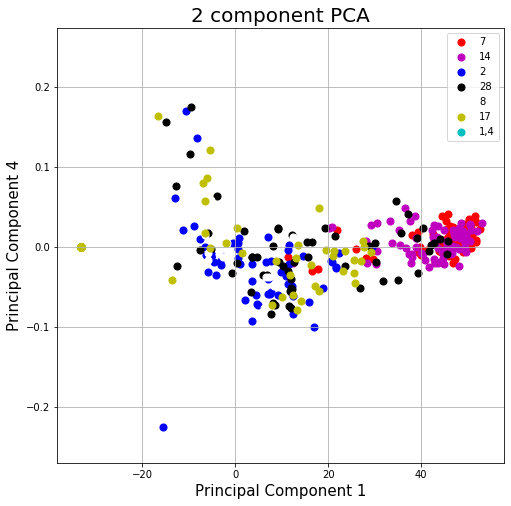

In [69]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 4', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['7','14','2','28','8','17','1'',4']
colors = ['r','m','b','k','w','y','c','g']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Simulation'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 9']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [50]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])


In [51]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [53]:
principalComponents

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.